In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

df = pd.read_csv('aviation-accidents.csv')

df['date'] = pd.to_datetime(df['date'], errors='coerce')

df = df.dropna(subset=['date'])

df = df.sort_values('date')
df['date'] = df['date'].interpolate(method='pad')
df['weekday'] = df['date'].dt.day_name()
df.set_index('date', inplace=True)

df['year'] = df['year'].astype(int)

df = df.drop(columns=['registration', 'location'])

df['operator'].fillna("not defined", inplace=True)

df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')
df['fatalities'].fillna(0, inplace=True)

df['country'].fillna("not defined", inplace=True)
df['country'].replace('Unknown country', 'not defined', inplace=True)

filtered_df = df[df['country'] != 'not defined']

print(df.head(10))


C:\Users\crist\AppData\Local\Temp\ipykernel_3000\2673924848.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


                               type                   operator  fatalities  \
date                                                                         
1919-08-02            Caproni Ca.48                    Caproni        14.0   
1919-08-11          Felixstowe Fury                        RAF         1.0   
1920-02-23         Handley Page O/7     Handley Page Transport         0.0   
1920-02-25       Handley Page O/400     Handley Page Transport         0.0   
1920-06-30       Handley Page O/400     Handley Page Transport         0.0   
1920-12-14       Handley Page O/400     Handley Page Transport         4.0   
1921-01-15            Aeromarine 75         Aeromarine Airways         0.0   
1921-03-02         Handley Page O/7  HP Indo-Burmese Transport         0.0   
1921-03-04  Caproni Ca.60 Noviplano                    Caproni         0.0   
1921-08-26      Farman F.60 Goliath                      SNETA         2.0   

                 country cat  year    weekday  
date           

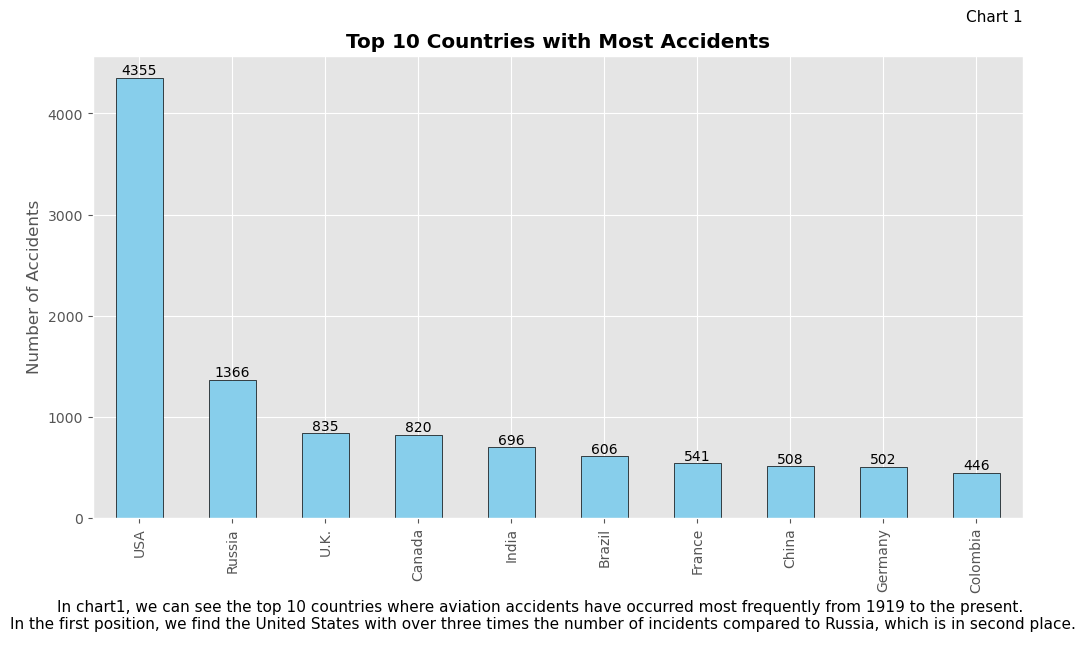

In [2]:
plt.style.use('ggplot')

top_countries = filtered_df['country'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)

for i, v in enumerate(top_countries.values):
    ax.text(i, v + 0.2, str(v), color='black', ha='center', va='bottom')

plt.title('Top 10 Countries with Most Accidents', fontweight='bold')
plt.xlabel('') 
plt.ylabel('Number of Accidents')

plt.figtext(0.5, -0.1, """
In chart1, we can see the top 10 countries where aviation accidents have occurred most frequently from 1919 to the present. 
In the first position, we find the United States with over three times the number of incidents compared to Russia, which is in second place.
""", wrap=True, ha='center', fontsize=11)

plt.text(1, 1.1, 'Chart 1', ha='right', va='top', color='black', fontsize=11, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'), transform=ax.transAxes)

plt.show()


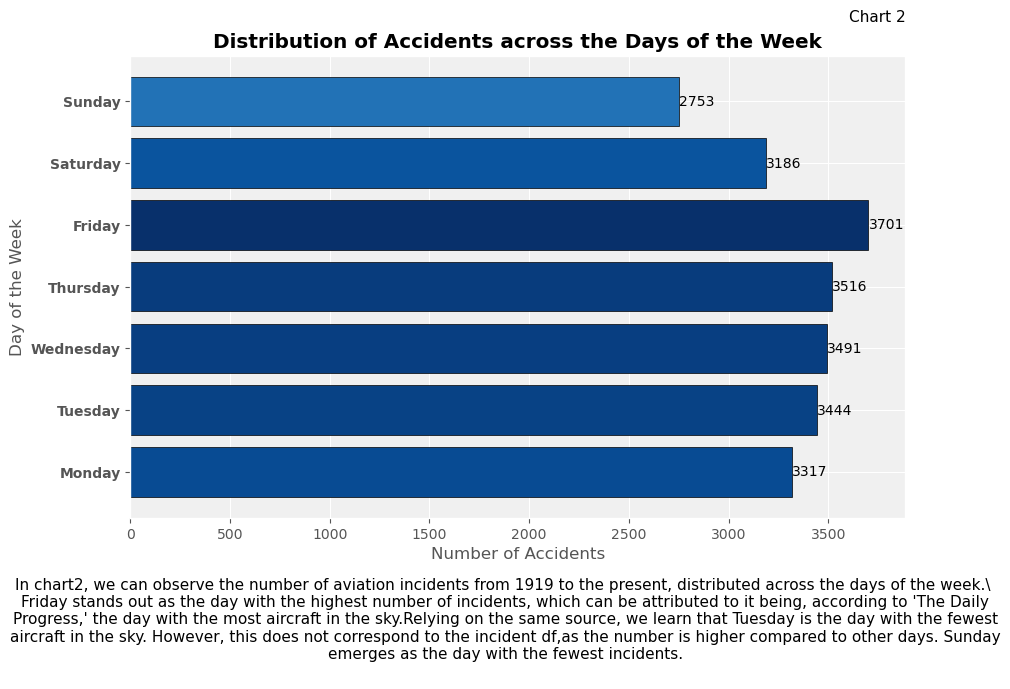

In [3]:
plt.style.use('ggplot')

weekday_counts = df['weekday'].value_counts()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = weekday_counts.reindex(weekday_order)

max_value = weekday_counts.max()
color_difference = weekday_counts / max_value

colors = plt.cm.Blues(color_difference)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#F0F0F0')

bars = ax.barh(weekday_counts.index, weekday_counts, color=colors, edgecolor='black', linewidth=0.5)

plt.title('Distribution of Accidents across the Days of the Week', fontweight='bold')
plt.xlabel('Number of Accidents')
plt.ylabel('Day of the Week')

for bar, count in zip(bars, weekday_counts):
    width = bar.get_width()
    ax.text(width + 0.2, bar.get_y() + bar.get_height() / 2, str(count), ha='left', va='center', color='black')

ax.set_yticks(range(len(weekday_counts)))
ax.set_yticklabels(weekday_counts.index, fontweight='bold')


fig.text(0.5, -0.15, """
In chart2, we can observe the number of aviation incidents from 1919 to the present, distributed across the days of the week.\ 
Friday stands out as the day with the highest number of incidents, which can be attributed to it being, according to 'The Daily Progress,' the day with the most aircraft in the sky.\
Relying on the same source, we learn that Tuesday is the day with the fewest aircraft in the sky. However, this does not correspond to the incident df,\
as the number is higher compared to other days. Sunday emerges as the day with the fewest incidents.
""",
         wrap=True, ha='center', fontsize=11)

plt.text(1, 1.1, 'Chart 2', ha='right', va='top', color='black', fontsize=11, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'), transform=ax.transAxes)

plt.show()


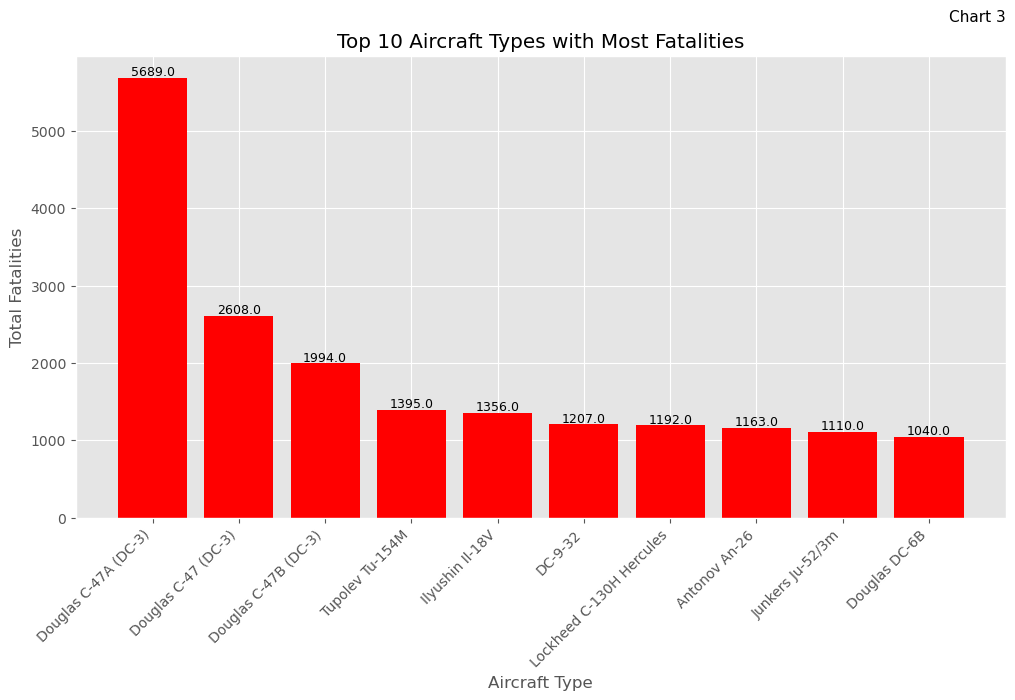

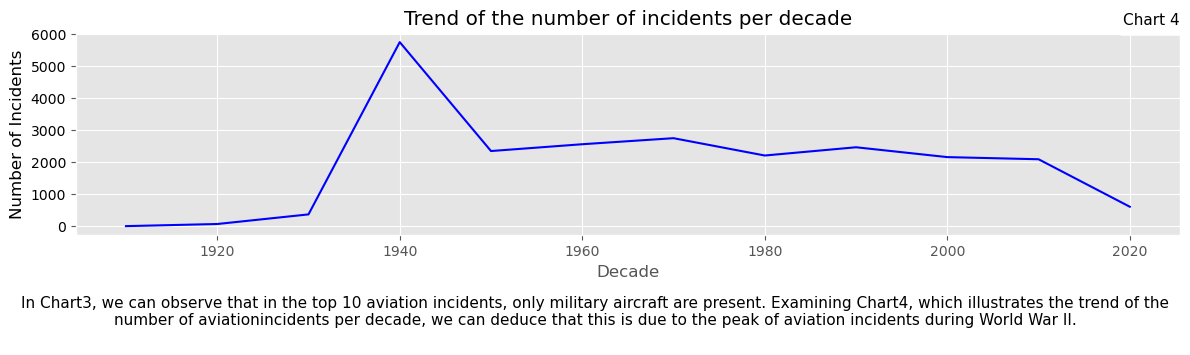

In [4]:
df['decade'] = (df['year'] // 10) * 10

aircraft_fatalities = df.groupby('type')['fatalities'].agg(['sum', 'count']).sort_values(by='sum', ascending=False)
top_types = aircraft_fatalities.head(10)

fig1, ax1 = plt.subplots(figsize=(12, 6))
bars = ax1.bar(top_types.index, top_types['sum'], color='red')  

for bar, total_fatalities in zip(bars, top_types['sum']):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 30, str(total_fatalities), ha='center', color='black', fontsize=9)

ax1.set_title('Top 10 Aircraft Types with Most Fatalities')
ax1.set_xlabel('Aircraft Type')
ax1.set_ylabel('Total Fatalities')
ax1.set_xticks(top_types.index)
ax1.set_xticklabels(top_types.index, rotation=45, ha='right')  

ax1.text(1, 1.1, 'Chart 3', ha='right', va='top', color='black', fontsize=11, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'), transform=ax1.transAxes)

fig2, ax2 = plt.subplots(figsize=(12, 3))
line = ax2.plot(df.groupby('decade')['fatalities'].count(), linestyle='-', color='blue', label='Incidents Trend')

ax2.set_title('Trend of the number of incidents per decade')
ax2.set_ylabel('Number of Incidents', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_xlabel('Decade')

fig2.text(0.5, -0.15, """
In Chart3, we can observe that in the top 10 aviation incidents, only military aircraft are present. Examining Chart4, which illustrates the trend of the number of aviation\
incidents per decade, we can deduce that this is due to the peak of aviation incidents during World War II.
""",
         wrap=True, ha='center', fontsize=11)

ax2.text(1, 1.1, 'Chart 4', ha='right', va='top', color='black', fontsize=11, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'), transform=ax2.transAxes)

plt.tight_layout()
plt.show()


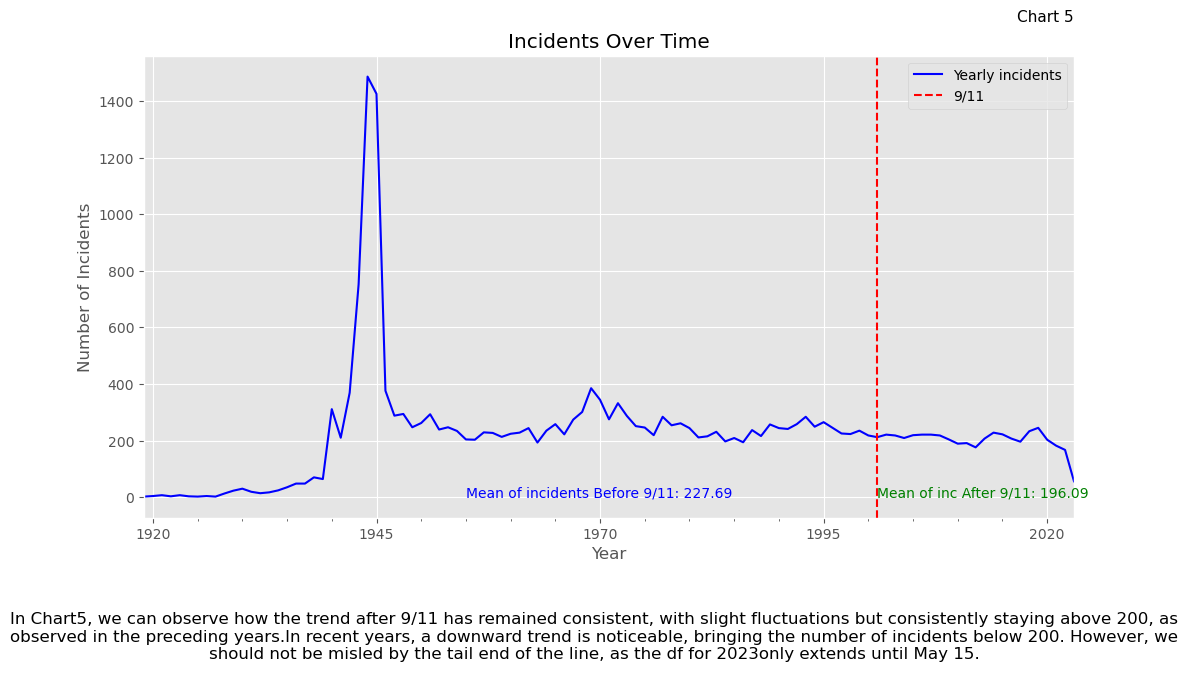

In [5]:
before_911 = df[df.index < '2001-09-11']
after_911 = df[df.index >= '2001-09-11']

total_incidents_before = len(before_911)
total_incidents_after = len(after_911)

total_fatalities_before = before_911['fatalities'].sum()
total_fatalities_after = after_911['fatalities'].sum()

mean_incidents_before = before_911.resample('Y').size().mean()
mean_incidents_after = after_911.resample('Y').size().mean()

plt.figure(figsize=(12, 6))
ax = df.resample('Y').size().plot(label='Yearly incidents', color='blue')
plt.axvline('2001-09-11', color='red', linestyle='--', label='9/11')

ax.text('1955-01-01', -0.3, f'Mean of incidents Before 9/11: {mean_incidents_before:.2f}', color='blue', ha='left')
ax.text('2001-10-10', -0.3, f'Mean of inc After 9/11: {mean_incidents_after:.2f}', color='green', ha='left')

plt.figtext(0.5, -0.15, """
In Chart5, we can observe how the trend after 9/11 has remained consistent, with slight fluctuations but consistently staying above 200, as observed in the preceding years.\
In recent years, a downward trend is noticeable, bringing the number of incidents below 200. However, we should not be misled by the tail end of the line, as the df for 2023\
only extends until May 15.
""",
         wrap=True, ha='center', fontsize=12, color='black')

plt.text(1, 1.1, 'Chart 5', ha='right', va='top', color='black', fontsize=11, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'), transform=ax.transAxes)


plt.title('Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

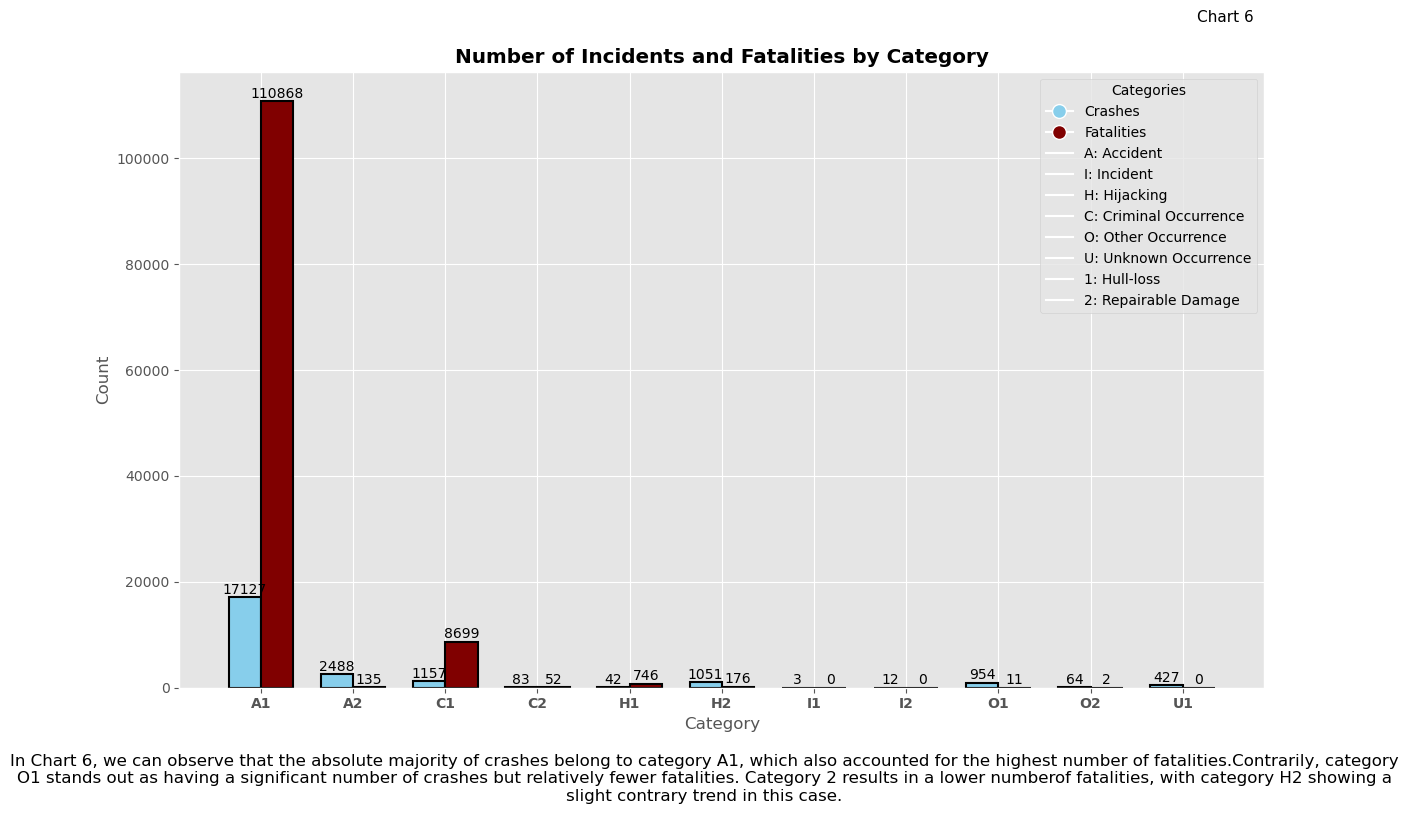

In [6]:
legend_labels = {
    'A': 'Accident',
    'I': 'Incident',
    'H': 'Hijacking',
    'C': 'Criminal Occurrence',
    'O': 'Other Occurrence',
    'U': 'Unknown Occurrence',
    '1': 'Hull-loss',
    '2': 'Repairable Damage'
}

fig, ax = plt.subplots(figsize=(14, 8))

incident_counts = df['cat'].value_counts().sort_index()
fatalities_by_category = df.groupby('cat')['fatalities'].sum().sort_index()

bar_width = 0.35

bar_positions = range(len(incident_counts))

bars1 = ax.bar(bar_positions, incident_counts, width=bar_width, label='Incidents', color='skyblue', edgecolor='black', linewidth=1.5)

bars2 = ax.bar([pos + bar_width for pos in bar_positions], fatalities_by_category, width=bar_width, label='Fatalities', color='#800000', edgecolor='black', linewidth=1.5)

ax.set_xticks([pos + bar_width/2 for pos in bar_positions])
ax.set_xticklabels(incident_counts.index, fontweight='bold')
ax.set_xlabel('Category')

for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 50, round(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 50, round(yval), ha='center', va='bottom')

ax.set_ylabel('Count')
ax.set_title('Number of Incidents and Fatalities by Category', fontweight='bold')  

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='Crashes'),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#800000', markersize=10, label='Fatalities')] 

for key, value in legend_labels.items():
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=0, label=f"{key}: {value}"))

plt.figtext(0.5, -0.05, """
In Chart 6, we can observe that the absolute majority of crashes belong to category A1, which also accounted for the highest number of fatalities.\
Contrarily, category O1 stands out as having a significant number of crashes but relatively fewer fatalities. Category 2 results in a lower number\
of fatalities, with category H2 showing a slight contrary trend in this case.
""",
         wrap=True, ha='center', fontsize=12, color='black')
    
plt.text(0.99, 1.1, 'Chart 6', ha='right', va='top', color='black', fontsize=11, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'), transform=ax.transAxes)

    
ax.legend(handles=legend_handles, title='Categories', bbox_to_anchor=(1, 1))

plt.show()


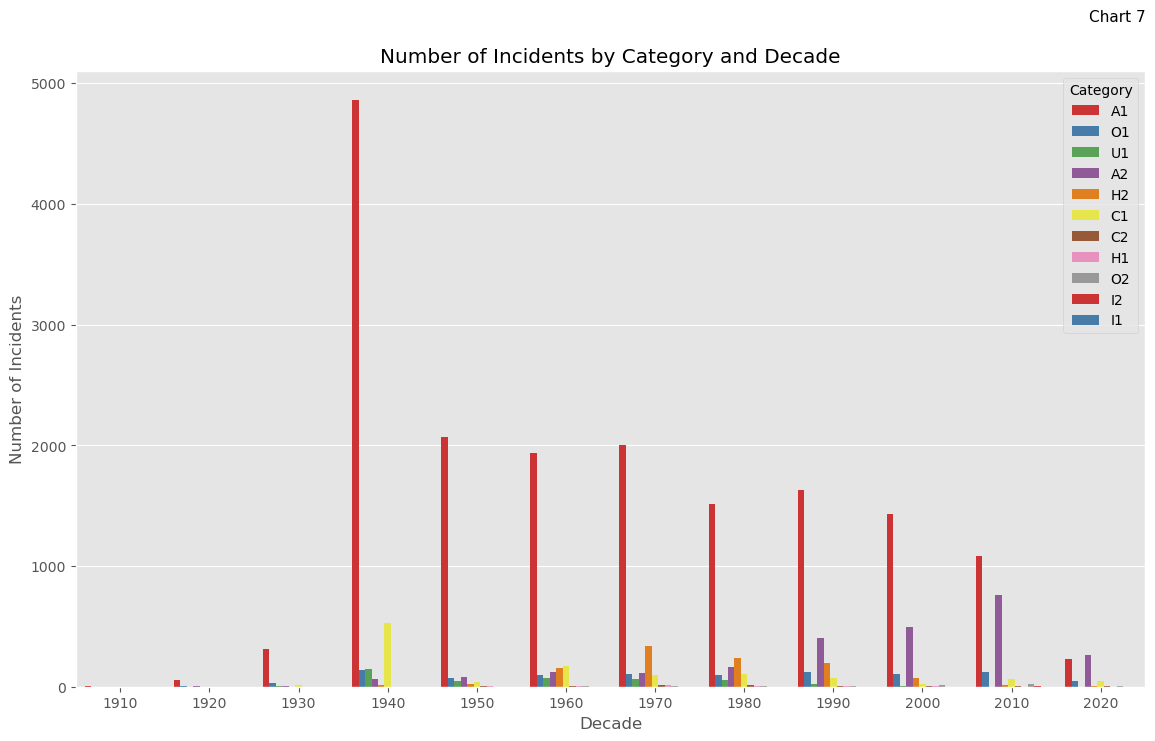

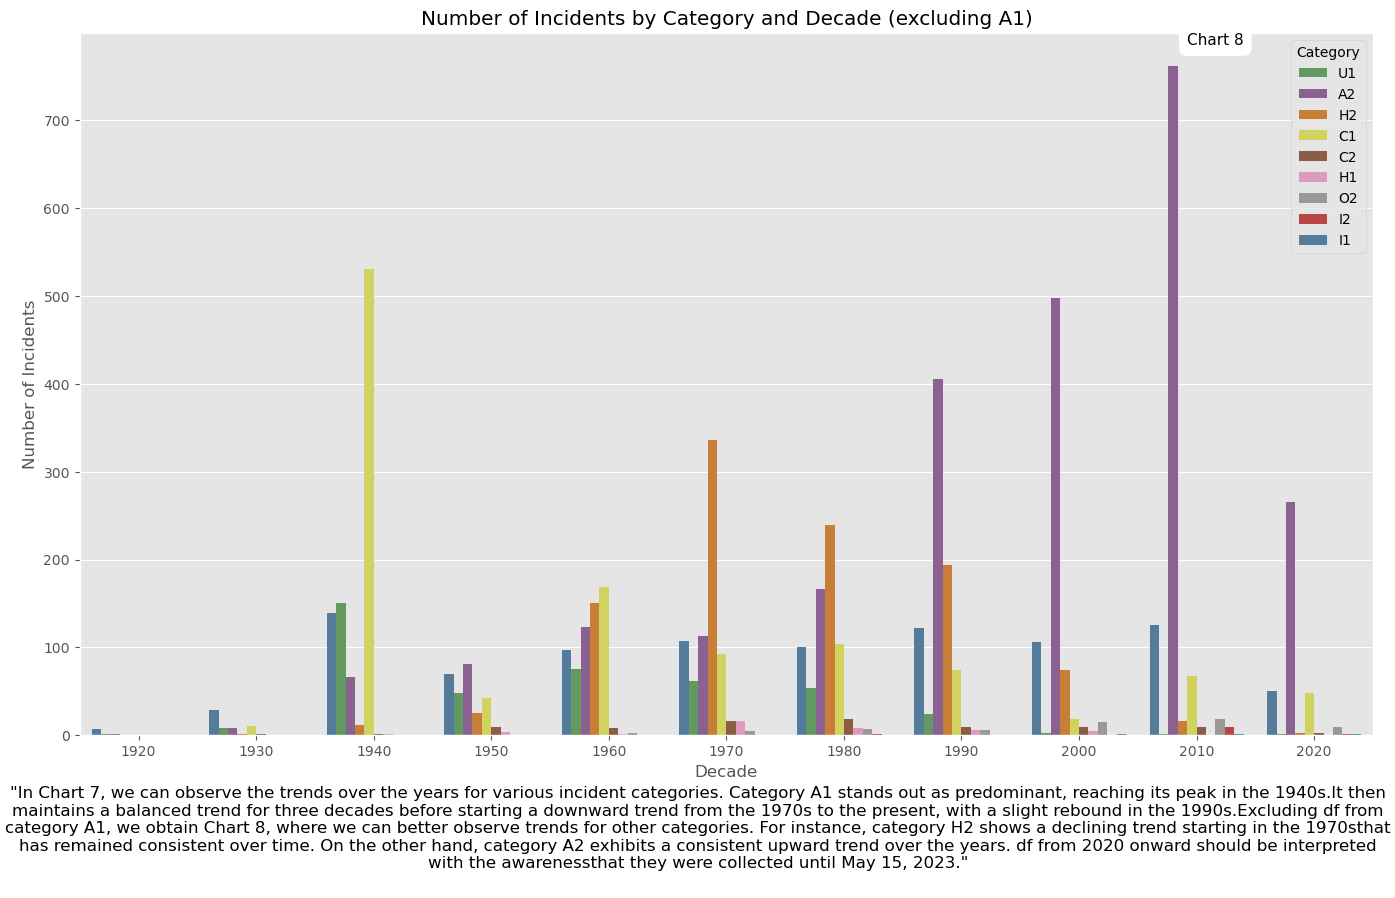

In [10]:
color_palette = sns.color_palette('Set1', 11)

df['decade'] = (df['year'] // 10) * 10

plt.figure(figsize=(13.8, 8))
ax1 = sns.countplot(data=df, x='decade', hue='cat', palette=color_palette)

ax1.text(1, 1.1, 'Chart 7', ha='right', va='top', color='black', fontsize=11, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'), transform=ax1.transAxes)

plt.xlabel('Decade')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Category and Decade')
plt.legend(title='Category', bbox_to_anchor=(1, 1))

legend = ax1.legend_
category_colors = [handle.get_facecolor() for handle in legend.legend_handles]  
color_mapping = {category: color for category, color in zip(df['cat'].unique(), category_colors)}

plt.figure(figsize=(13.8, 8))
ax2 = sns.countplot(data=df[df['cat'] != 'A1'], x='decade', hue='cat', palette=color_mapping)

plt.figtext(0.5, -0.11, """
"In Chart 7, we can observe the trends over the years for various incident categories. Category A1 stands out as predominant, reaching its peak in the 1940s.\
It then maintains a balanced trend for three decades before starting a downward trend from the 1970s to the present, with a slight rebound in the 1990s.\
Excluding df from category A1, we obtain Chart 8, where we can better observe trends for other categories. For instance, category H2 shows a declining trend starting in the 1970s\
that has remained consistent over time. On the other hand, category A2 exhibits a consistent upward trend over the years. df from 2020 onward should be interpreted with the awareness\
that they were collected until May 15, 2023."
""",
         wrap=True, ha='center', fontsize=12)

ax2.text(0.9, 1, 'Chart 8', ha='right', va='top', color='black', fontsize=11, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'), transform=ax2.transAxes)

plt.xlabel('Decade')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Category and Decade (excluding A1)')

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[1:], labels[1:], title='Category', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


C:\Users\crist\AppData\Local\Temp\ipykernel_3000\3882779628.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


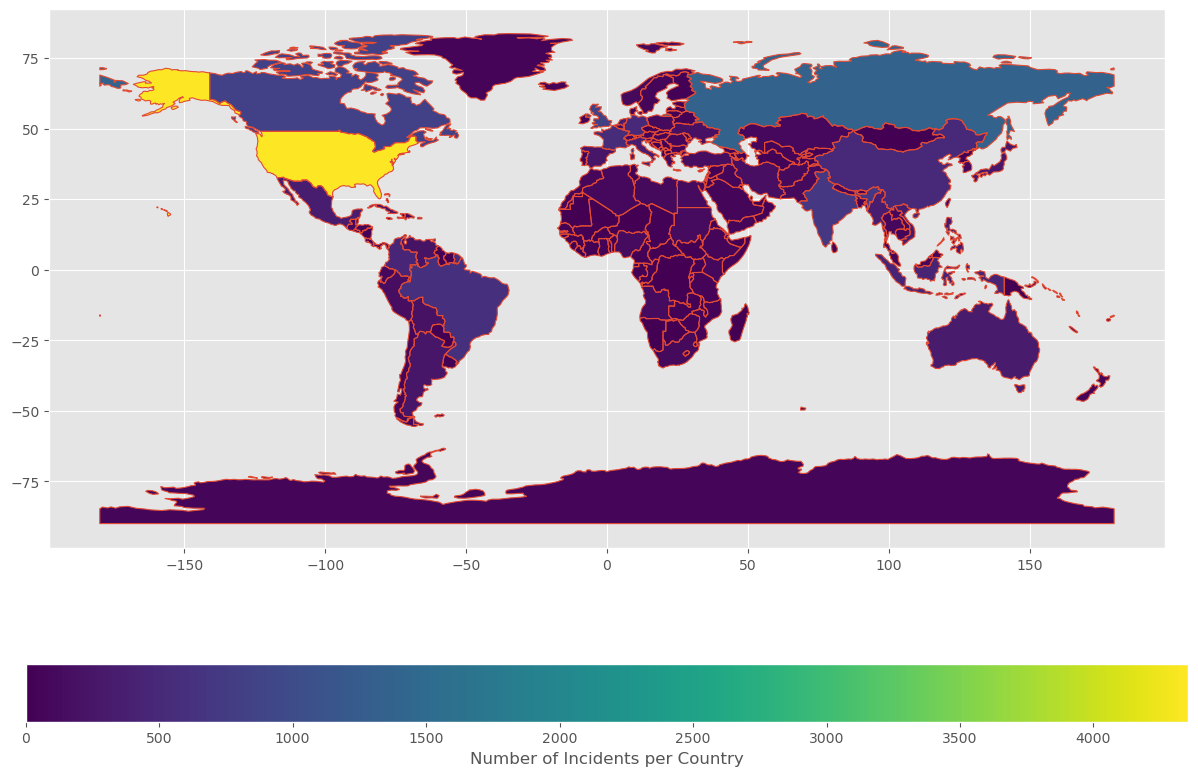

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

df['country'] = df['country'].replace({'USA': 'United States of America'})
df['country'] = df['country'].replace({'U.K.': 'United Kingdom'})

incidents_by_country = df.groupby('country').size().reset_index(name='num_incidents')

world = world.merge(incidents_by_country, left_on='name', right_on='country', how='left')

world['num_incidents'].fillna(0, inplace=True)

world = world[world['name'] != 'not defined']

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=0.8)

world.plot(column='num_incidents', ax=ax, legend=True,
           legend_kwds={'label': "Number of Incidents per Country",
                        'orientation': "horizontal"},
           cmap='viridis')

plt.show()
